In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [9]:
df = pd.read_csv('/Users/mattmastin/Desktop/airbnb/df_smol.csv')

In [10]:
# Dataset cleaned, formatted & simplified

print(df.shape)
df.head()

(21846, 10)


,neighborhood,room_type,accommodates,bedrooms,number_of_reviews,wifi,cable_tv,washer,kitchen,price
0,2,1,3,1.0,118,1,0,1,1,60.0
1,3,2,2,1.0,6,1,1,1,1,17.0
2,3,1,4,1.0,143,1,1,1,1,90.0
3,6,2,2,1.0,25,1,1,1,0,26.0
4,3,2,2,1.0,197,1,1,0,0,42.0


In [ ]:
neighborhood_dict = {'Friedrichshain-Kreuzberg': 1,
'Mitte': 2,
'Pankow': 3,
'Neukölln': 4,
'Charlottenburg-Wilm.': 5,
'Tempelhof - Schöneberg': 6,
'Lichtenberg': 7,
'Treptow - Köpenick': 8,
'Steglitz - Zehlendorf': 9,
'Reinickendorf': 10,
'Marzahn - Hellersdorf':11,
'Spandau': 12}

room_dict = {'Entire home/apt': 1, 'Private room': 2, 'Shared room': 3}

In [12]:
train, test = train_test_split(df, test_size=0.2, random_state=1)

target = 'price'
features = ['neighborhood', 'room_type', 'accommodates', 
           'bedrooms', 'number_of_reviews', 'wifi', 'cable_tv', 
           'washer', 'kitchen']

X_train = train[features]
X_test = test[features]
y_train = train[target]
y_test = test[target]

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17476, 9), (4370, 9), (17476,), (4370,))

In [17]:
# Hyperparameter tuning on Random Forest Regressor model

pipeline = make_pipeline(RandomForestRegressor())

param_grid = {
    'randomforestregressor__n_estimators': [100, 200, 500, 1000],
    'randomforestregressor__max_features': [3, 4, 5, 6, 7, 8],
    'randomforestregressor__min_samples_leaf': [1, 5, 10, 20]
}

search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    verbose=1,
    return_train_score=True,
    n_jobs=-1)

search.fit(X_train, y_train)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 288 out of 288 | elapsed:  9.5min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=None,
                                                              min_samples_leaf=1,
                                                              min_samples_split=2,
                                                              min_weight_fraction_leaf=0.0,

In [21]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

y_pred = search.predict(X_test)
print('rmse', rmse(y_test, y_pred))
print('rmsle', rmsle(y_test, y_pred))

rmse 219.20340639765865
rmsle 0.5080956180557105


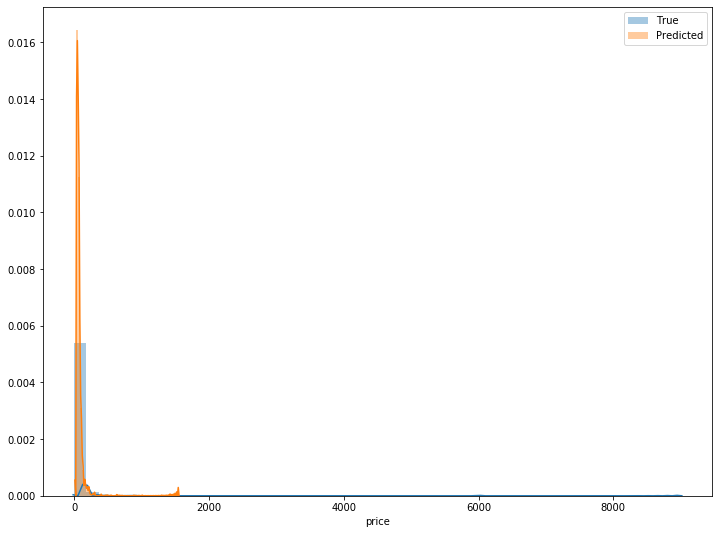

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
sns.distplot(y_test, label='True')
sns.distplot(y_pred, label='Predicted')
plt.legend();

In [ ]:
# import pickle

# pickle.dump(model, open('tuned_random_forest.pkl', 'wb'))